In [113]:
import pandas as pd
import matplotlib.pyplot as plt

import os
from datetime import datetime

### Read progress and records files

In [114]:
environments = {
    "water_tank": {
        "base_dir": "../../logs/ppo/double_water_tank",
        "tracked_point": "x2",
    },
    "CPAP": {
        "base_dir": "../../logs/ppo/CPAP",
        "tracked_point": "x3",
    },
}

base_dir, tracked_point = environments["water_tank"].values()

folders = [f for f in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, f))]

def folder_to_datetime(folder_name):
    """
    Função para converter o nome da pasta em um objeto datetime
    """
    return datetime.strptime(folder_name, '%d-%m-%H%M')


# Encontrar a pasta com o timestamp mais recente
latest_folder = max(folders, key=folder_to_datetime)

print(f"A pasta mais recente é: {latest_folder}")

A pasta mais recente é: 28-01-0137


In [115]:
progress_df = pd.read_csv(f"{base_dir}/{latest_folder}/progress.csv")
rec_df = pd.read_csv(f"{base_dir}/{latest_folder}/records.csv")

In [116]:
progress_df.head()

,train/learning_rate,train/policy_gradient_loss,train/loss,train/std,train/iteration,train/entropy_loss,train/clip_fraction,train/n_updates,train/value_loss,train/explained_variance,train/approx_kl,train/clip_range
0,0.0003,0.0,-0.050207,3.028549,1,-1.975425,0.945183,10,0.125819,NaN,0.493273,0.2


In [117]:
rec_df

,x1,x2,y_ref,z_t,PID_action,PPO_action,action,reward,error,steps_in_episode,is_start_episode
0,9.602189,0.066568,3.0,0.000000,0.821361,0.0000,0.821361,-6.200518,2.490084,1,True
1,9.333120,0.509916,3.0,2.490084,1.283910,0.6205,1.904410,-4.582291,2.140629,2,False
2,9.381351,0.859371,3.0,4.630713,1.684079,0.0000,1.684079,-3.371042,1.836040,3,False
3,9.365196,1.163960,3.0,6.466753,2.026920,0.0000,2.026920,-2.436568,1.560951,4,False
4,9.447659,1.439049,3.0,8.027703,2.317103,0.0000,2.317103,-1.707597,1.306750,5,False
...,...,...,...,...,...,...,...,...,...,...,...
999995,3.630637,1.030133,2.0,3.259269,2.577589,0.0000,2.577589,-0.710950,0.843178,1996,False
999996,3.898147,1.156822,2.0,4.102448,2.567454,1.0000,3.567454,-0.503024,0.709242,1997,False
999997,4.368815,1.290758,2.0,4.811690,2.556739,1.0000,3.556739,-0.324510,0.569658,1998,False
999998,4.819625,1.430342,2.0,5.381348,2.545573,0.0000,2.545573,-0.187358,0.432849,1999,False


### Plot Train over iteraçtion

In [118]:
# # Plotting train/loss vs train/iteration
# plt.figure(figsize=(12, 6))
# plt.plot(progress_df['train/iteration'], progress_df['train/loss'], label='Train Loss')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.title('Train Loss vs. Iteration')
# plt.legend()
# plt.grid(True)
# plt.show()

### Plote reward over steps

In [119]:
# Find the index of the last episode start
last_episode_start_idx = rec_df[rec_df['is_start_episode']].index[-1]

# Filter the dataframe for the last episode
last_episode_df = rec_df.loc[last_episode_start_idx:]

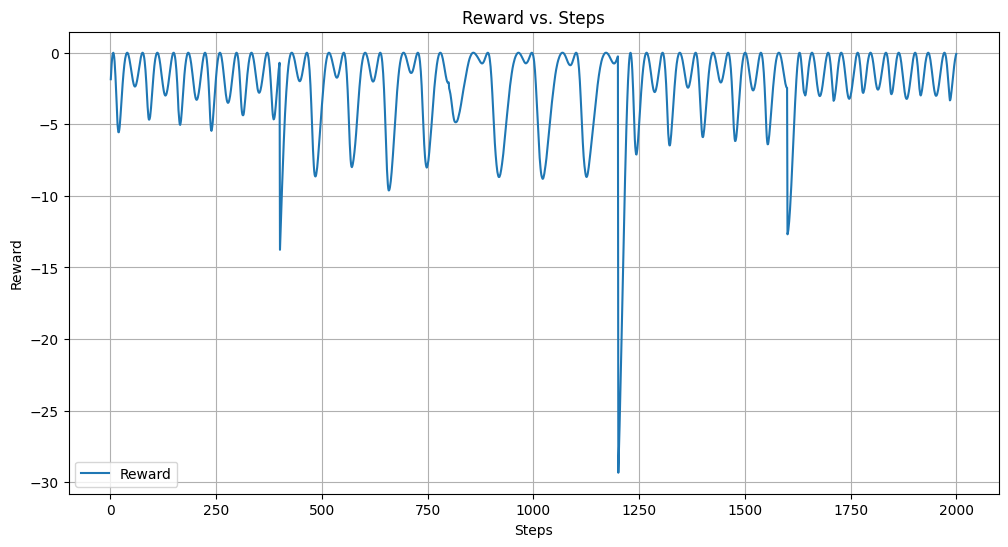

In [120]:
# Plotting reward vs steps
plt.figure(figsize=(12, 6))
plt.plot(last_episode_df['steps_in_episode'], last_episode_df['reward'], label='Reward')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Reward vs. Steps')
plt.legend()
plt.grid(True)
plt.show()

### Plot Set point curve

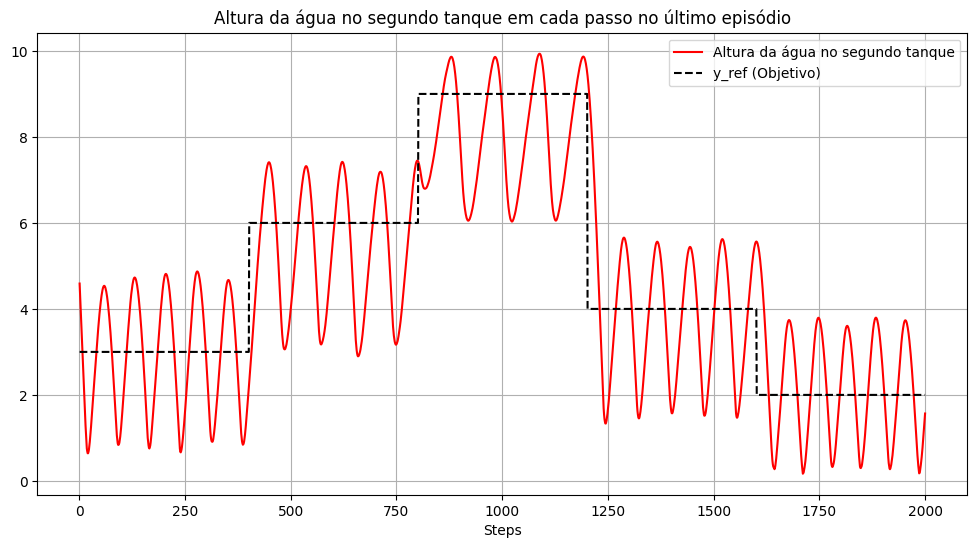

In [121]:
# Plot y_ref vs steps_in_episode
plt.figure(figsize=(12, 6))
plt.plot(last_episode_df['steps_in_episode'], last_episode_df[tracked_point], label="Altura da água no segundo tanque", color='red')
plt.plot(last_episode_df['steps_in_episode'], last_episode_df['y_ref'], '--', label='y_ref (Objetivo)', color='black')
plt.xlabel('Steps')
plt.ylabel('')
plt.title('Altura da água no segundo tanque em cada passo no último episódio')
plt.legend()
plt.grid(True)
plt.show()

### Ação do PPO durante o último episódio

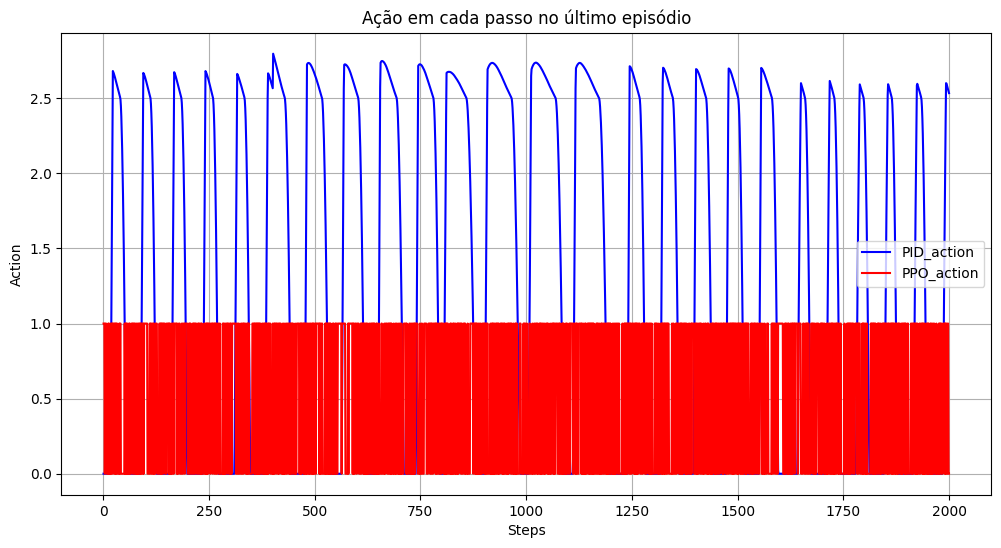

In [122]:
# Plotting action vs steps in the last episode
plt.figure(figsize=(12, 6))
plt.plot(last_episode_df['steps_in_episode'], last_episode_df['PID_action'], label='PID_action', color='blue')
plt.plot(last_episode_df['steps_in_episode'], last_episode_df['PPO_action'], label='PPO_action', color='red')
# plt.plot(last_episode_df['steps_in_episode'], last_episode_df['action'], label='Action', color='black')
plt.xlabel('Steps')
plt.ylabel('Action')
plt.title('Ação em cada passo no último episódio')
plt.legend()
plt.grid(True)
plt.show()